In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(0,50,501)

In [6]:
y = np.sin(x)

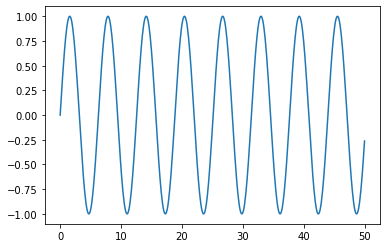

In [8]:
plt.plot(x,y)

In [9]:
df = pd.DataFrame(data=y,index=x,columns=['sine'])

In [10]:
df.head()

sine
0.0  0.000000
0.1  0.099833
0.2  0.198669
0.3  0.295520
0.4  0.389418

In [11]:
len(df)

501

In [12]:
501*0.1

50.1

In [13]:
test_point = np.round(len(df)*0.1)

In [14]:
test_point

50.0

In [15]:
test_ind = int(len(df)-test_point)

In [16]:
test_ind

451

In [17]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [18]:
train

sine
0.0   0.000000
0.1   0.099833
0.2   0.198669
0.3   0.295520
0.4   0.389418
...        ...
44.6  0.579164
44.7  0.657656
44.8  0.729577
44.9  0.794208
45.0  0.850904

[451 rows x 1 columns]

In [19]:
test

sine
45.1  0.899097
45.2  0.938307
45.3  0.968142
45.4  0.988304
45.5  0.998591
45.6  0.998900
45.7  0.989229
45.8  0.969673
45.9  0.940429
46.0  0.901788
46.1  0.854137
46.2  0.797952
46.3  0.733794
46.4  0.662304
46.5  0.584197
46.6  0.500252
46.7  0.411309
46.8  0.318257
46.9  0.222024
47.0  0.123573
47.1  0.023888
47.2 -0.076037
47.3 -0.175201
47.4 -0.272615
47.5 -0.367305
47.6 -0.458325
47.7 -0.544766
47.8 -0.625764
47.9 -0.700509
48.0 -0.768255
48.1 -0.828324
48.2 -0.880118
48.3 -0.923117
48.4 -0.956893
48.5 -0.981108
48.6 -0.995521
48.7 -0.999986
48.8 -0.994460
48.9 -0.978997
49.0 -0.953753
49.1 -0.918979
49.2 -0.875023
49.3 -0.822324
49.4 -0.761408
49.5 -0.692885
49.6 -0.617439
49.7 -0.535823
49.8 -0.448854
49.9 -0.357400
50.0 -0.262375

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [58]:
scaler.fit(train)

MinMaxScaler()

In [24]:
scaled_train = scaler.transform(train)

In [25]:
scaled_test = scaler.transform(test)

In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [59]:
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [61]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [60]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622]
Predict this y: 
 [[0.59933458]]


In [62]:
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [63]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622 0.59933458 0.64776041 0.69470985 0.73971381
 0.78232262 0.82211054 0.85868004 0.89166571]
Predict this y: 
 [[0.92073798]]


In [64]:
length = 50
batch_size=1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [65]:
len(scaled_train)

451

In [66]:
len(generator)

401

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [68]:
n_featured = 1

In [69]:
model = Sequential()
model.add(SimpleRNN(50,input_shape=(length,n_featured)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.fit_generator(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 3s 7ms/step - loss: 0.0243
Epoch 2/5
401/401 [==============================] - 3s 7ms/step - loss: 2.3265e-04
Epoch 3/5
401/401 [==============================] - 3s 7ms/step - loss: 1.8700e-04
Epoch 4/5
401/401 [==============================] - 3s 7ms/step - loss: 3.4192e-04
Epoch 5/5
401/401 [==============================] - 3s 7ms/step - loss: 7.0351e-05


In [73]:
losses = pd.DataFrame(model.history.history)

In [74]:
losses

loss
0  0.024254
1  0.000233
2  0.000187
3  0.000342
4  0.000070

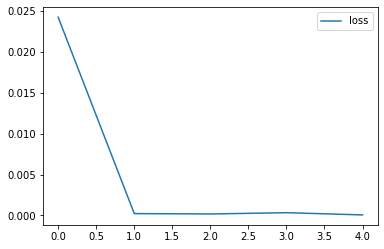

In [75]:
losses.plot()

In [76]:
first_eval_batch = scaled_train[-length:]

In [77]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [78]:
first_eval_batch = first_eval_batch.reshape((1,length,n_featured))

In [79]:
model.predict(first_eval_batch)

array([[0.9440797]], dtype=float32)

In [80]:
scaled_test[0]

array([0.94955134])

In [81]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_featured))

In [82]:
current_batch


array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [83]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [84]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_featured))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

In [85]:
test_predictions

[array([0.9440797], dtype=float32),
 array([0.9621261], dtype=float32),
 array([0.9752929], dtype=float32),
 array([0.9811343], dtype=float32),
 array([0.98368484], dtype=float32),
 array([0.97976285], dtype=float32),
 array([0.97088], dtype=float32),
 array([0.9578393], dtype=float32),
 array([0.9386932], dtype=float32),
 array([0.9155346], dtype=float32),
 array([0.88830405], dtype=float32),
 array([0.856768], dtype=float32),
 array([0.8222087], dtype=float32),
 array([0.783857], dtype=float32),
 array([0.74275684], dtype=float32),
 array([0.69986653], dtype=float32),
 array([0.65482426], dtype=float32),
 array([0.607667], dtype=float32),
 array([0.5595917], dtype=float32),
 array([0.51011395], dtype=float32),
 array([0.4596033], dtype=float32),
 array([0.40903008], dtype=float32),
 array([0.35828486], dtype=float32),
 array([0.30785286], dtype=float32),
 array([0.25867695], dtype=float32),
 array([0.21113078], dtype=float32),
 array([0.16589676], dtype=float32),
 array([0.12369119],

In [86]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [87]:
true_predictions = scaler.inverse_transform(test_predictions)

In [88]:
test['Predictions'] = true_predictions

c:\users\qadri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
test

sine  Predictions
45.1  0.899097     0.888154
45.2  0.938307     0.924247
45.3  0.968142     0.950580
45.4  0.988304     0.962263
45.5  0.998591     0.967364
45.6  0.998900     0.959520
45.7  0.989229     0.941754
45.8  0.969673     0.915673
45.9  0.940429     0.877381
46.0  0.901788     0.831064
46.1  0.854137     0.776604
46.2  0.797952     0.713532
46.3  0.733794     0.644414
46.4  0.662304     0.567711
46.5  0.584197     0.485512
46.6  0.500252     0.399732
46.7  0.411309     0.309648
46.8  0.318257     0.215334
46.9  0.222024     0.119184
47.0  0.123573     0.020230
47.1  0.023888    -0.080791
47.2 -0.076037    -0.181937
47.3 -0.175201    -0.283426
47.4 -0.272615    -0.384289
47.5 -0.367305    -0.482640
47.6 -0.458325    -0.577732
47.7 -0.544766    -0.668199
47.8 -0.625764    -0.752610
47.9 -0.700509    -0.830098
48.0 -0.768255    -0.899363
48.1 -0.828324    -0.958993
48.2 -0.880118    -1.009563
48.3 -0.923117    -1.049750
48.4 -0.956893    -1.079001
48.5 -0.981108    -1.099112
48.6 -0.995521    -1.108306
48.7 -0.999986    -1.107342
48.8 -0.994460    -1.098186
48.9 -0.978997    -1.078805
49.0 -0.953753    -1.051044
49.1 -0.918979    -1.015778
49.2 -0.875023    -0.970888
49.3 -0.822324    -0.919173
49.4 -0.761408    -0.859964
49.5 -0.692885    -0.791777
49.6 -0.617439    -0.717173
49.7 -0.535823    -0.634671
49.8 -0.448854    -0.544160
49.9 -0.357400    -0.448193
50.0 -0.262375    -0.345653

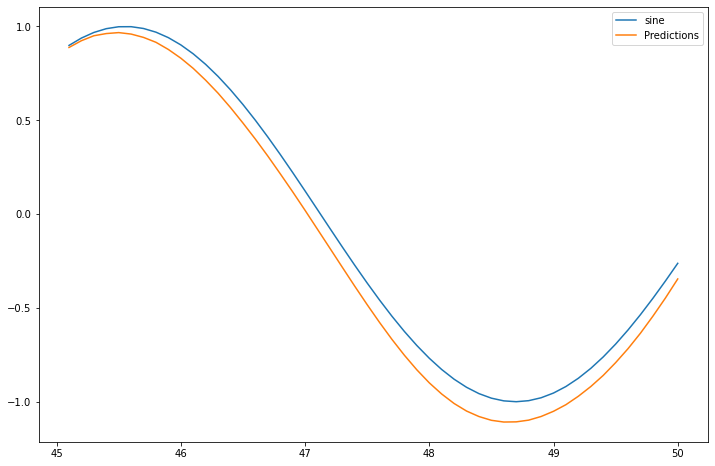

In [90]:
test.plot(figsize=(12,8))

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [94]:
length=49
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

valid_gen = TimeseriesGenerator(scaled_test, scaled_test,length=length,batch_size=1)

In [95]:
model = Sequential()
model.add(LSTM(50,input_shape=(length,n_featured)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [96]:
model.fit_generator(generator,validation_data=valid_gen,epochs=20,callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 5s 14ms/step - loss: 0.0127 - val_loss: 2.1292e-04
Epoch 2/20
402/402 [==============================] - 5s 13ms/step - loss: 2.1106e-04 - val_loss: 9.0876e-06
Epoch 3/20
402/402 [==============================] - 5s 14ms/step - loss: 3.1451e-04 - val_loss: 2.0508e-04
Epoch 4/20
402/402 [==============================] - 5s 13ms/step - loss: 2.6714e-04 - val_loss: 2.9335e-04


In [98]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_featured))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

c:\users\qadri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


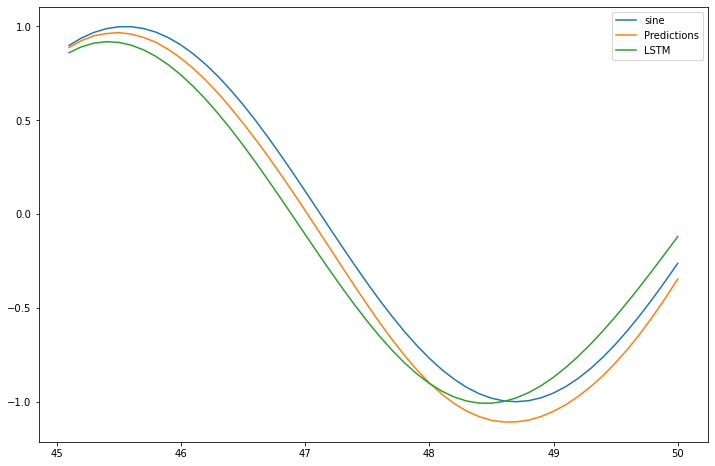

In [99]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM'] = true_predictions
test.plot(figsize=(12,8))

In [100]:
full_scaler = MinMaxScaler()

In [101]:
scaled_full_data = full_scaler.fit_transform(df)

In [102]:
length=50
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [103]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_featured)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6
451/451 [==============================] - 6s 13ms/step - loss: 0.0162
Epoch 2/6
451/451 [==============================] - 6s 13ms/step - loss: 4.1325e-05
Epoch 3/6
451/451 [==============================] - 6s 13ms/step - loss: 4.3341e-05
Epoch 4/6
451/451 [==============================] - 6s 13ms/step - loss: 7.4463e-05
Epoch 5/6
451/451 [==============================] - 6s 13ms/step - loss: 4.8680e-04
Epoch 6/6
451/451 [==============================] - 6s 13ms/step - loss: 4.2803e-05


In [105]:
forecast = []
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_featured))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [106]:
forecast = scaler.inverse_transform(forecast)

In [107]:
df


sine
0.0   0.000000
0.1   0.099833
0.2   0.198669
0.3   0.295520
0.4   0.389418
...        ...
49.6 -0.617439
49.7 -0.535823
49.8 -0.448854
49.9 -0.357400
50.0 -0.262375

[501 rows x 1 columns]

In [108]:
len(forecast)

50

In [109]:
50*0.1

5.0

In [110]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [111]:
len(forecast_index)

50

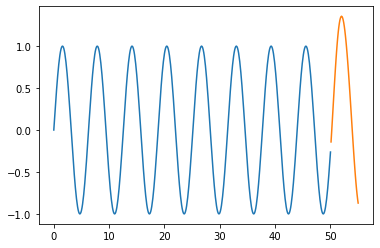

In [113]:
plt.plot(df.index,df['sine'])
plt.plot(forecast_index,forecast)